In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")
np.random.seed(42)

In [ ]:
cities = [0, 1, 2, 3, 4]

adjacency_mat = np.asarray(
    [
        [0.00, 28.02, 17.12, 27.46, 46.07],
        [28.02, 0.00, 34.00, 25.55, 25.55],
        [17.12, 34.00, 0.00, 18.03, 57.38],
        [27.46, 25.55, 18.03, 0.00, 51.11],
        [46.07, 25.55, 57.38, 51.11, 0.00],
    ]
)

In [ ]:
class Population():
    def __init__(self, bag, adjacency_mat):
        self.bag = bag
        self.parents = []
        self.score = 0
        self.best = None
        self.adjacency_mat = adjacency_mat

    def fitness(self, chromosome):
      return sum(
          [
              self.adjacency_mat[chromosome[i], chromosome[i + 1]]
              for i in range(len(chromosome) - 1)
          ]
      )   

    def evaluate(self):
      distances = np.asarray(
          [self.fitness(chromosome) for chromosome in self.bag]
      )
      self.score = np.min(distances)
      self.best = self.bag[distances.tolist().index(self.score)]
      self.parents.append(self.best)
      if False in (distances[0] == distances):
          distances = np.max(distances) - distances
      return distances / np.sum(distances)

    def select(self, k=4):
        fit = self.evaluate()
        while len(self.parents) < k:
            idx = np.random.randint(0, len(fit))
            if fit[idx] > np.random.rand():
                self.parents.append(self.bag[idx])
        self.parents = np.asarray(self.parents)

    def swap(self, chromosome):
        a, b = np.random.choice(len(chromosome), 2)
        chromosome[a], chromosome[b] = (
            chromosome[b],
            chromosome[a],
        )
        return chromosome        

    def crossover(self, p_cross=0.1):
        children = []
        count, size = self.parents.shape
        for _ in range(len(self.bag)):
            if np.random.rand() > p_cross:
                children.append(
                    list(self.parents[np.random.randint(count, size=1)[0]])
                )
            else:
                parent1, parent2 = self.parents[
                    np.random.randint(count, size=2), :
                ]
                idx = np.random.choice(range(size), size=2, replace=False)
                start, end = min(idx), max(idx)
                child = [None] * size
                for i in range(start, end + 1, 1):
                    child[i] = parent1[i]
                pointer = 0
                for i in range(size):
                    if child[i] is None:
                        while parent2[pointer] in child:
                            pointer += 1
                        child[i] = parent2[pointer]
                children.append(child)
        return children

    def mutate(self, p_cross=0.1, p_mut=0.1):
        next_bag = []
        children = self.crossover(p_cross)
        for child in children:
            if np.random.rand() < p_mut:
                next_bag.append(self.swap(child))
            else:
                next_bag.append(child)
        return next_bag        

In [ ]:
def genetic_algorithm(
    cities,
    adjacency_mat,
    n_population=5,
    n_iter=20,
    selectivity=0.15,
    p_cross=0.5,
    p_mut=0.1,
    print_interval=100,
    return_history=False,
    verbose=False,):
    pop = init_population(cities, adjacency_mat, n_population)
    best = pop.best
    score = float("inf")
    history = []
    for i in range(n_iter):
        pop.select(n_population * selectivity)
        history.append(pop.score)
        if verbose:
            print(f"Generation {i}: {pop.score}")
        elif i % print_interval == 0:
            print(f"Generation {i}: {pop.score}")
        if pop.score < score:
            best = pop.best
            score = pop.score
        children = pop.mutate(p_cross, p_mut)
        pop = Population(children, pop.adjacency_mat)
    if return_history:
        return best, history
    return best

In [ ]:

def init_population(cities, adjacency_mat, n_population):
    return Population(
        np.asarray([np.random.permutation(cities) for _ in range(n_population)]), 
        adjacency_mat
    )
    

In [ ]:
genetic_algorithm(cities, adjacency_mat, verbose=True)

Generation 0: 105.04
Generation 1: 105.04
Generation 2: 105.04
Generation 3: 105.04
Generation 4: 105.04
Generation 5: 105.04
Generation 6: 104.13
Generation 7: 104.13
Generation 8: 104.13
Generation 9: 104.13
Generation 10: 104.13
Generation 11: 104.13
Generation 12: 104.13
Generation 13: 104.13
Generation 14: 104.13
Generation 15: 104.13
Generation 16: 88.72
Generation 17: 88.72
Generation 18: 88.72
Generation 19: 88.72


[3, 2, 0, 1, 4]

In [ ]:
pop = init_population(cities, adjacency_mat, 5)
pop.bag

array([[4, 2, 0, 3, 1],
       [2, 0, 4, 1, 3],
       [1, 2, 4, 0, 3],
       [0, 3, 1, 4, 2],
       [0, 1, 2, 4, 3]])

Generation 0: 104.13
Generation 20: 104.13
Generation 40: 88.72
Generation 60: 86.25
Generation 80: 86.25


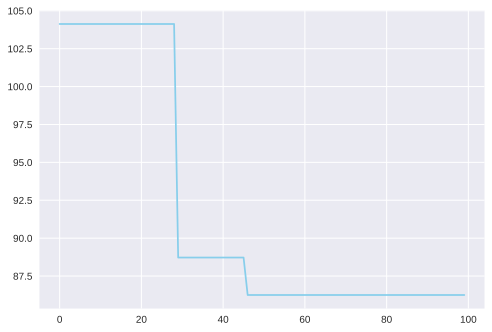

[4, 1, 3, 2, 0]


In [ ]:
best, history = genetic_algorithm(
    cities,
    adjacency_mat,
    n_iter=100,
    verbose=False,
    print_interval=20,
    return_history=True,
)

plt.plot(range(len(history)), history, color="skyblue")
plt.show()
print(best)